# ROR1 Expression from CD20+ regions from a MCL Cohort from Fox Chase Cancer Center.

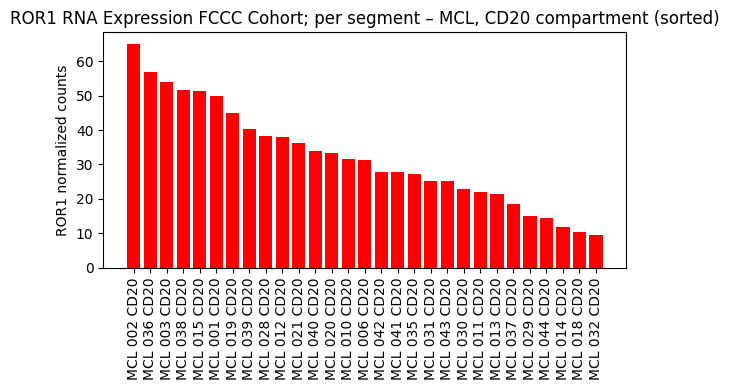

Saved plot to: ROR1_MCL_CD20_bar_sorted_desc_red.png
Sorted ROR1 values (MCL, CD20):
Collect DL BCL TMA | 002 | CD20    65.192982
Collect DL BCL TMA | 036 | CD20    57.049348
Collect DL BCL TMA | 003 | CD20    53.975441
Collect DL BCL TMA | 038 | CD20    51.587255
Collect DL BCL TMA | 015 | CD20    51.491749
Collect DL BCL TMA | 001 | CD20    50.014597
Collect DL BCL TMA | 019 | CD20    44.999516
Collect DL BCL TMA | 039 | CD20    40.417106
Collect DL BCL TMA | 028 | CD20    38.283901
Collect DL BCL TMA | 012 | CD20    37.998727
Collect DL BCL TMA | 021 | CD20    36.380489
Collect DL BCL TMA | 040 | CD20    33.880230
Collect DL BCL TMA | 020 | CD20    33.207931
Collect DL BCL TMA | 010 | CD20    31.474168
Collect DL BCL TMA | 006 | CD20    31.305533
Collect DL BCL TMA | 042 | CD20    27.946542
Collect DL BCL TMA | 041 | CD20    27.900880
Collect DL BCL TMA | 035 | CD20    27.277471
Collect DL BCL TMA | 031 | CD20    25.312268
Collect DL BCL TMA | 043 | CD20    25.059888
Collect DL BCL 

In [9]:
# === Config ===
FILE_PATH   = "/content/drive/MyDrive/01_FCCC/01_UPMC/Fox-Chase downloads/IF/Normalized RNA HK.xlsx"
DIAGNOSIS   = "MCL"
COMPARTMENT = "CD20"   # CD20 mask

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_ror1_by_diag_compartment(excel_path, diagnosis, compartment,
                                  out_png=None, show_plot=True):
    """
    Bar chart of ROR1 expression per segment for a given
    diagnosis *and* compartment (SegmentLabel), sorted descending.
    """

    # 1) Load sheets
    seg = pd.read_excel(excel_path, sheet_name="SegmentProperties")
    tcm = pd.read_excel(excel_path, sheet_name="TargetCountMatrix")

    # 2) Basic checks
    for col in ["ROIComments", "SegmentLabel", "SegmentDisplayName"]:
        if col not in seg.columns:
            raise KeyError(f"Column '{col}' not found in SegmentProperties.")

    if "TargetName" not in tcm.columns:
        raise KeyError("Column 'TargetName' not found in TargetCountMatrix.")

    # 3) Subset segments: diagnosis + compartment
    mask = (seg["ROIComments"] == diagnosis) & (seg["SegmentLabel"] == compartment)
    seg_sub = seg[mask]

    if seg_sub.empty:
        raise ValueError(
            f"No segments with diagnosis='{diagnosis}' and compartment='{compartment}'."
        )

    segment_names = seg_sub["SegmentDisplayName"].tolist()

    # 4) Extract ROR1 row
    ror1_row = tcm[tcm["TargetName"].astype(str).str.upper() == "ROR1"]
    if ror1_row.empty:
        raise ValueError("ROR1 not found in TargetName column.")

    missing = [c for c in segment_names if c not in ror1_row.columns]
    if missing:
        raise KeyError(
            "These SegmentDisplayName columns are missing in TargetCountMatrix: "
            + ", ".join(missing[:10])
        )

    ror1_values = ror1_row[segment_names].iloc[0]

    # --- sort by descending ROR1 ---
    ror1_values = ror1_values.sort_values(ascending=False)
    segment_names_sorted = ror1_values.index.tolist()

    # 5) Shorten labels for x-axis
    def shorten(name: str) -> str:
        parts = [p.strip() for p in name.split("|")]
        return f"{parts[1]} {parts[2]}" if len(parts) >= 3 else name

    x_labels = ["MCL " + shorten(s) for s in segment_names_sorted]

    # 6) Plot (red bars)
    plt.figure(figsize=(6, 4))
    x = np.arange(len(ror1_values))
    plt.bar(x, ror1_values.values, color="red")

    plt.xticks(x, x_labels, rotation=90)
    plt.ylabel("ROR1 normalized counts")
    plt.title(f"ROR1 RNA Expression FCCC Cohort; per segment – {diagnosis}, {compartment} compartment (sorted)")
    plt.tight_layout()

    if out_png is not None:
        plt.savefig(out_png, dpi=300)

    if show_plot:
        plt.show()
    else:
        plt.close()

    return ror1_values


# === Run for MCL / CD20 ===
out_png = f"ROR1_{DIAGNOSIS}_{COMPARTMENT}_bar_sorted_desc_red.png"
ror1_series = plot_ror1_by_diag_compartment(FILE_PATH, DIAGNOSIS, COMPARTMENT,
                                            out_png=out_png)

print("Saved plot to:", out_png)
print("Sorted ROR1 values (MCL, CD20):")
print(ror1_series)